In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
train = pd.read_csv('train_df_nonull.csv')
test= pd.read_csv('test_df_nonull.csv')
valA = pd.read_csv('val_a_df_nonull.csv')
valB = pd.read_csv('val_b_df_nonull.csv')

In [3]:
train.head()

,Unnamed: 0.1,Unnamed: 0,all_transactions_announced_date,target_issuer,ticker,total_transaction_value_usdmm_historical_rate,price_per_share_usd_historical_rate,sellers,public_offerings_offer_date,number_of_shares_offered,...,gdp_growth_rate,inflation_rate,unemployment_rate,interest_rate,stock_market_index,market_volatility,consumer_confidence_index,exchange_rate,15_percent_profit,10_percent_profit
0,3,700,5/14/2021,Femasys Inc. (FEMY),FEMY,34.45,13.0,-,6/17/2021,2650000.0,...,7.0,2.27,5.9,0.08,4221.86,17.75,85.5,129.0313,False,False
1,4,1692,10/31/2019,"AnPac Bio-Medical Science Co., Ltd. (ANPC)",ANPC,16.00,12.0,-,1/30/2020,1333360.0,...,-4.6,1.64,3.5,1.55,3273.40,16.39,99.8,129.0313,False,False
2,5,637,2/26/2021,"TransCode Therapeutics, Inc. (RNAZ)",RNAZ,25.00,4.0,-,7/8/2021,6250000.0,...,2.7,2.22,5.4,0.10,4320.82,19.00,81.2,129.0313,False,False
3,7,2484,4/11/2016,"Midland States Bancorp, Inc. (MSBI)",MSBI,80.05,22.0,-,5/23/2016,3638755.0,...,1.2,1.56,4.8,0.37,2040.04,16.33,94.7,121.5959,False,False
4,10,185,11/19/2021,"Vigil Neuroscience, Inc. (VIGL)",VIGL,98.00,14.0,-,1/7/2022,7000000.0,...,-1.6,2.48,4.0,0.08,4677.03,18.76,67.2,129.0313,False,False


## Gaussian Mixture Modeling for Regime creation

In [4]:
from sklearn.mixture import GaussianMixture

selected_features= ['gdp_growth_rate','interest_rate', 'market_volatility']
n_components = 4  # Number of regimes
gmm = GaussianMixture(n_components=n_components, random_state=42)
train['regime'] = gmm.fit_predict(train[selected_features])



In [5]:
for i in range(n_components):
    print(f"Component {i}:")
    print(f"  Mean: {gmm.means_[i]}")
    print(f"  Covariance: {gmm.covariances_[i]}")



Component 0:
  Mean: [ 2.65430198  1.72931684 14.74450847]
  Covariance: [[ 6.56317026e-01  3.97888618e-03 -6.48332243e-01]
 [ 3.97888618e-03  4.40797146e-01  1.76849124e+00]
 [-6.48332243e-01  1.76849124e+00  2.35925949e+01]]
Component 1:
  Mean: [35.3         0.0912987  25.72181818]
  Covariance: [[ 1.00000000e-06  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.23003879e-05 -3.70106257e-03]
 [ 0.00000000e+00 -3.70106257e-03  1.93213016e+00]]
Component 2:
  Mean: [-29.05666667   0.088       36.55266667]
  Covariance: [[2.06251232e+01 4.73953334e-01 3.28202844e+01]
 [4.73953334e-01 1.10970000e-02 6.93488667e-01]
 [3.28202844e+01 6.93488667e-01 1.17057701e+02]]
Component 3:
  Mean: [ 3.72051391  0.19165613 19.38098219]
  Covariance: [[10.15732261 -0.55252241  0.65227661]
 [-0.55252241  0.08237179 -0.10939295]
 [ 0.65227661 -0.10939295 24.71822404]]


In [6]:
# Create a DataFrame with the means of the Gaussian components
means_df = pd.DataFrame(gmm.means_, columns=selected_features, index=[f'Regime {i+1}' for i in range(n_components)])

# Display the table
means_df



,gdp_growth_rate,interest_rate,market_volatility
Regime 1,2.654302,1.729317,14.744508
Regime 2,35.300000,0.091299,25.721818
Regime 3,-29.056667,0.088000,36.552667
Regime 4,3.720514,0.191656,19.380982


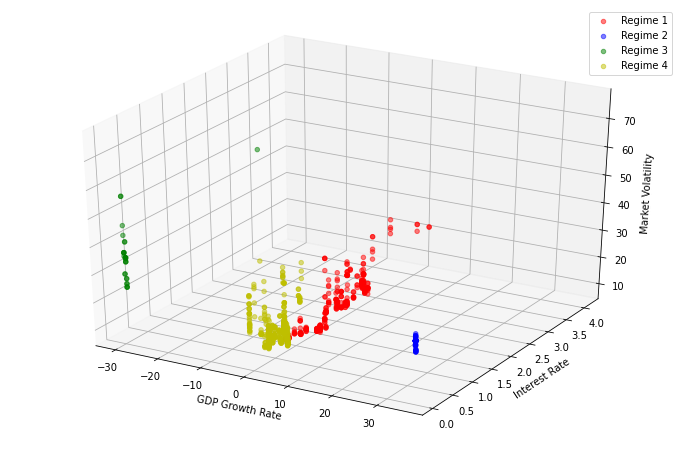

In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

colors = ['r', 'b', 'g', 'y'] 

for i in range(n_components):
    data_subset = train[train['regime'] == i]
    ax.scatter(data_subset['gdp_growth_rate'], data_subset['interest_rate'], data_subset['market_volatility'],
               c=colors[i], label=f'Regime {i+1}', alpha=0.5)

ax.set_xlabel('GDP Growth Rate')
ax.set_ylabel('Interest Rate')
ax.set_zlabel('Market Volatility')
ax.legend()
plt.show()



For the above, I use GDP growth rate, interest rate, and market volatility. I chose to remove inflation rate and unemployment rate because I believe the necessary effects would be included via interest rate changes, and the fact that interest rate changes are a more direct effect on IPO conditions. Similarly, market volatility may be able to explain upswing and downswings in valuations of companies, it is an important factor (Angelini and Foglia, 2018)


The Gaussian Mixture techniques help me in creating regimes. I chose them over k-means due to the underlying probabilistic mechanism of GMMs. 

Intuitive explanation of the above regimes:

<b>Regime 1</b> seems to represent a relatively stable market condition with moderate GDP growth, higher interest rates, and lower market volatility. This could be indicative of a growing economy with central banks raising interest rates to prevent overheating and control inflation.

<b>Regime 2</b> represents a high-growth market condition with a significantly high GDP growth rate, very low interest rates, and moderate-to-high market volatility. This could be indicative of a booming economy with central banks keeping interest rates low to encourage investment and stimulate growth.

<b>Regime 3</b> represents a recessionary market condition with negative GDP growth, very low interest rates, and high market volatility. This could be indicative of an economic downturn with central banks lowering interest rates to boost spending and stimulate growth.

<b>Regime 4</b> represents a stable-to-growing market condition with moderate GDP growth, low interest rates, and moderate market volatility. This could be indicative of a recovering or stable economy with central banks maintaining low interest rates to support growth.

In [8]:
# Assign regimes to valA, valB, and test sets
valA_data = valA.copy()
valA_data['regime'] = gmm.predict(valA_data[selected_features])

valB_data = valB.copy()
valB_data['regime'] = gmm.predict(valB_data[selected_features])

test_data = test.copy()
test_data['regime'] = gmm.predict(test_data[selected_features])



### Encoding variables in data after regime assignment

In [9]:
import category_encoders as ce

encoder = ce.BinaryEncoder(cols=['sellers', 'primary_industry_target_issuer'])

# Fit the encoder using the training data
encoder.fit(train)

# Transform the train, test, and validation data using the fitted encoder
train_encoded = encoder.transform(train)
valA_encoded = encoder.transform(valA_data)
test_encoded = encoder.transform(test_data)
valB_encoded= encoder.transform(valB_data)

In [10]:
train_encoded1 = train_encoded.copy()

### Preparing data to create classification model

In [11]:
drop_cols = ['Unnamed: 0.1',
 'Unnamed: 0',
 'all_transactions_announced_date',
 'target_issuer',
 'ticker', 'equity_offering_values_1_day_return_',
 'equity_offering_values_1_month_return_',
 'equity_offering_values_3_month_return_',
 'equity_offering_values_1_year_return_', 'public_offerings_offer_date'
            ]
train_encoded1 = train_encoded1.drop(drop_cols, axis=1)
valA_encoded = valA_encoded.drop(drop_cols, axis=1)

test_encoded = test_encoded.drop(drop_cols, axis=1)
valB_encoded= valB_encoded.drop(drop_cols, axis=1)

In [12]:
train_encoded1

,total_transaction_value_usdmm_historical_rate,price_per_share_usd_historical_rate,sellers_0,sellers_1,sellers_2,sellers_3,sellers_4,sellers_5,sellers_6,number_of_shares_offered,...,inflation_rate,unemployment_rate,interest_rate,stock_market_index,market_volatility,consumer_confidence_index,exchange_rate,15_percent_profit,10_percent_profit,regime
0,34.45,13.0,0,0,0,0,0,0,1,2650000.0,...,2.27,5.9,0.08,4221.86,17.75,85.5,129.0313,False,False,3
1,16.00,12.0,0,0,0,0,0,0,1,1333360.0,...,1.64,3.5,1.55,3273.40,16.39,99.8,129.0313,False,False,3
2,25.00,4.0,0,0,0,0,0,0,1,6250000.0,...,2.22,5.4,0.10,4320.82,19.00,81.2,129.0313,False,False,3
3,80.05,22.0,0,0,0,0,0,0,1,3638755.0,...,1.56,4.8,0.37,2040.04,16.33,94.7,121.5959,False,False,3
4,98.00,14.0,0,0,0,0,0,0,1,7000000.0,...,2.48,4.0,0.08,4677.03,18.76,67.2,129.0313,False,False,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,412.50,15.0,0,0,0,0,0,0,1,27500000.0,...,1.96,4.7,0.54,2259.53,11.75,98.2,126.9037,False,False,0
942,192.00,16.0,1,0,0,1,1,1,1,12000000.0,...,1.54,4.9,0.38,2105.26,13.63,93.5,121.8463,False,False,3
943,325.00,16.0,1,0,1,0,0,0,0,20312500.0,...,2.34,5.4,0.10,4374.30,16.33,81.2,129.0313,False,False,3
944,331.56,18.0,0,0,0,0,0,0,1,18420000.0,...,1.68,4.9,0.40,2144.29,14.41,87.2,122.2133,False,False,3


In [13]:
# Loop through the columns and convert string columns to numerical
for column in train_encoded1.columns:
    first_value_type = type(train_encoded1[column].iloc[0])
    if first_value_type is str:
        train_encoded1[column] = pd.to_numeric(train_encoded1[column], errors='coerce')

for column in valA_encoded.columns:
    first_value_type = type(valA_encoded[column].iloc[0])
    if first_value_type is str:
        valA_encoded[column] = pd.to_numeric(valA_encoded[column], errors='coerce')

        
for column in test_encoded.columns:
    first_value_type = type(test_encoded[column].iloc[0])
    if first_value_type is str:
        test_encoded[column] = pd.to_numeric(test_encoded[column], errors='coerce')
        
for column in valB_encoded.columns:
    first_value_type = type(valB_encoded[column].iloc[0])
    if first_value_type is str:
        valB_encoded[column] = pd.to_numeric(valB_encoded[column], errors='coerce')

In [14]:
train_encoded1

,total_transaction_value_usdmm_historical_rate,price_per_share_usd_historical_rate,sellers_0,sellers_1,sellers_2,sellers_3,sellers_4,sellers_5,sellers_6,number_of_shares_offered,...,inflation_rate,unemployment_rate,interest_rate,stock_market_index,market_volatility,consumer_confidence_index,exchange_rate,15_percent_profit,10_percent_profit,regime
0,34.45,13.0,0,0,0,0,0,0,1,2650000.0,...,2.27,5.9,0.08,4221.86,17.75,85.5,129.0313,False,False,3
1,16.00,12.0,0,0,0,0,0,0,1,1333360.0,...,1.64,3.5,1.55,3273.40,16.39,99.8,129.0313,False,False,3
2,25.00,4.0,0,0,0,0,0,0,1,6250000.0,...,2.22,5.4,0.10,4320.82,19.00,81.2,129.0313,False,False,3
3,80.05,22.0,0,0,0,0,0,0,1,3638755.0,...,1.56,4.8,0.37,2040.04,16.33,94.7,121.5959,False,False,3
4,98.00,14.0,0,0,0,0,0,0,1,7000000.0,...,2.48,4.0,0.08,4677.03,18.76,67.2,129.0313,False,False,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,412.50,15.0,0,0,0,0,0,0,1,27500000.0,...,1.96,4.7,0.54,2259.53,11.75,98.2,126.9037,False,False,0
942,192.00,16.0,1,0,0,1,1,1,1,12000000.0,...,1.54,4.9,0.38,2105.26,13.63,93.5,121.8463,False,False,3
943,325.00,16.0,1,0,1,0,0,0,0,20312500.0,...,2.34,5.4,0.10,4374.30,16.33,81.2,129.0313,False,False,3
944,331.56,18.0,0,0,0,0,0,0,1,18420000.0,...,1.68,4.9,0.40,2144.29,14.41,87.2,122.2133,False,False,3


## Creating random forest classifier with CV

In [18]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Prepare the input features and target variable
X_train = train_encoded1.drop(['15_percent_profit', '10_percent_profit'], axis=1)
y_train = train_encoded1['15_percent_profit']

X_valA = valA_encoded.drop(['15_percent_profit', '10_percent_profit'], axis=1)
y_valA = valA_encoded['15_percent_profit']

# Create grid for cv values
random_forest_grid_values = {
    'max_features': np.linspace(1, X_train.shape[1], X_train.shape[1], dtype='int32'),
    'min_samples_leaf': [2, 5, 10],
    'n_estimators': [100, 500],
    'random_state': [90]
}

# Create model and cross-validate
random_forest = RandomForestClassifier()
random_forest_cv = GridSearchCV(random_forest, param_grid=random_forest_grid_values, scoring='accuracy', cv=5, verbose=2)

# Fit the GridSearchCV object to the training data
random_forest_cv.fit(X_train, y_train)

# Print the best parameters
print(random_forest_cv.best_params_)




Fitting 5 folds for each of 282 candidates, totalling 1410 fits
[CV] END max_features=1, min_samples_leaf=2, n_estimators=100, random_state=90; total time=   0.2s
[CV] END max_features=1, min_samples_leaf=2, n_estimators=100, random_state=90; total time=   0.2s
[CV] END max_features=1, min_samples_leaf=2, n_estimators=100, random_state=90; total time=   0.2s
[CV] END max_features=1, min_samples_leaf=2, n_estimators=100, random_state=90; total time=   0.2s
[CV] END max_features=1, min_samples_leaf=2, n_estimators=100, random_state=90; total time=   0.2s
[CV] END max_features=1, min_samples_leaf=2, n_estimators=500, random_state=90; total time=   0.8s
[CV] END max_features=1, min_samples_leaf=2, n_estimators=500, random_state=90; total time=   0.8s
[CV] END max_features=1, min_samples_leaf=2, n_estimators=500, random_state=90; total time=   0.9s
[CV] END max_features=1, min_samples_leaf=2, n_estimators=500, random_state=90; total time=   0.8s
[CV] END max_features=1, min_samples_leaf=2, 

[CV] END max_features=3, min_samples_leaf=10, n_estimators=100, random_state=90; total time=   0.2s
[CV] END max_features=3, min_samples_leaf=10, n_estimators=100, random_state=90; total time=   0.2s
[CV] END max_features=3, min_samples_leaf=10, n_estimators=500, random_state=90; total time=   0.8s
[CV] END max_features=3, min_samples_leaf=10, n_estimators=500, random_state=90; total time=   0.8s
[CV] END max_features=3, min_samples_leaf=10, n_estimators=500, random_state=90; total time=   0.8s
[CV] END max_features=3, min_samples_leaf=10, n_estimators=500, random_state=90; total time=   0.8s
[CV] END max_features=3, min_samples_leaf=10, n_estimators=500, random_state=90; total time=   0.8s
[CV] END max_features=4, min_samples_leaf=2, n_estimators=100, random_state=90; total time=   0.2s
[CV] END max_features=4, min_samples_leaf=2, n_estimators=100, random_state=90; total time=   0.2s
[CV] END max_features=4, min_samples_leaf=2, n_estimators=100, random_state=90; total time=   0.2s
[CV

[CV] END max_features=6, min_samples_leaf=5, n_estimators=500, random_state=90; total time=   1.0s
[CV] END max_features=6, min_samples_leaf=5, n_estimators=500, random_state=90; total time=   1.0s
[CV] END max_features=6, min_samples_leaf=5, n_estimators=500, random_state=90; total time=   1.0s
[CV] END max_features=6, min_samples_leaf=5, n_estimators=500, random_state=90; total time=   1.0s
[CV] END max_features=6, min_samples_leaf=10, n_estimators=100, random_state=90; total time=   0.2s
[CV] END max_features=6, min_samples_leaf=10, n_estimators=100, random_state=90; total time=   0.2s
[CV] END max_features=6, min_samples_leaf=10, n_estimators=100, random_state=90; total time=   0.2s
[CV] END max_features=6, min_samples_leaf=10, n_estimators=100, random_state=90; total time=   0.2s
[CV] END max_features=6, min_samples_leaf=10, n_estimators=100, random_state=90; total time=   0.2s
[CV] END max_features=6, min_samples_leaf=10, n_estimators=500, random_state=90; total time=   0.9s
[CV]

[CV] END max_features=9, min_samples_leaf=2, n_estimators=500, random_state=90; total time=   1.3s
[CV] END max_features=9, min_samples_leaf=5, n_estimators=100, random_state=90; total time=   0.3s
[CV] END max_features=9, min_samples_leaf=5, n_estimators=100, random_state=90; total time=   0.2s
[CV] END max_features=9, min_samples_leaf=5, n_estimators=100, random_state=90; total time=   0.2s
[CV] END max_features=9, min_samples_leaf=5, n_estimators=100, random_state=90; total time=   0.2s
[CV] END max_features=9, min_samples_leaf=5, n_estimators=100, random_state=90; total time=   0.2s
[CV] END max_features=9, min_samples_leaf=5, n_estimators=500, random_state=90; total time=   1.2s
[CV] END max_features=9, min_samples_leaf=5, n_estimators=500, random_state=90; total time=   1.2s
[CV] END max_features=9, min_samples_leaf=5, n_estimators=500, random_state=90; total time=   1.2s
[CV] END max_features=9, min_samples_leaf=5, n_estimators=500, random_state=90; total time=   1.2s
[CV] END m

[CV] END max_features=12, min_samples_leaf=2, n_estimators=100, random_state=90; total time=   0.3s
[CV] END max_features=12, min_samples_leaf=2, n_estimators=100, random_state=90; total time=   0.3s
[CV] END max_features=12, min_samples_leaf=2, n_estimators=100, random_state=90; total time=   0.3s
[CV] END max_features=12, min_samples_leaf=2, n_estimators=100, random_state=90; total time=   0.3s
[CV] END max_features=12, min_samples_leaf=2, n_estimators=500, random_state=90; total time=   1.5s
[CV] END max_features=12, min_samples_leaf=2, n_estimators=500, random_state=90; total time=   1.5s
[CV] END max_features=12, min_samples_leaf=2, n_estimators=500, random_state=90; total time=   1.5s
[CV] END max_features=12, min_samples_leaf=2, n_estimators=500, random_state=90; total time=   1.6s
[CV] END max_features=12, min_samples_leaf=2, n_estimators=500, random_state=90; total time=   1.6s
[CV] END max_features=12, min_samples_leaf=5, n_estimators=100, random_state=90; total time=   0.3s


[CV] END max_features=14, min_samples_leaf=10, n_estimators=100, random_state=90; total time=   0.3s
[CV] END max_features=14, min_samples_leaf=10, n_estimators=100, random_state=90; total time=   0.3s
[CV] END max_features=14, min_samples_leaf=10, n_estimators=500, random_state=90; total time=   1.4s
[CV] END max_features=14, min_samples_leaf=10, n_estimators=500, random_state=90; total time=   1.4s
[CV] END max_features=14, min_samples_leaf=10, n_estimators=500, random_state=90; total time=   1.4s
[CV] END max_features=14, min_samples_leaf=10, n_estimators=500, random_state=90; total time=   1.4s
[CV] END max_features=14, min_samples_leaf=10, n_estimators=500, random_state=90; total time=   1.4s
[CV] END max_features=15, min_samples_leaf=2, n_estimators=100, random_state=90; total time=   0.4s
[CV] END max_features=15, min_samples_leaf=2, n_estimators=100, random_state=90; total time=   0.4s
[CV] END max_features=15, min_samples_leaf=2, n_estimators=100, random_state=90; total time= 

[CV] END max_features=17, min_samples_leaf=5, n_estimators=500, random_state=90; total time=   1.7s
[CV] END max_features=17, min_samples_leaf=5, n_estimators=500, random_state=90; total time=   1.7s
[CV] END max_features=17, min_samples_leaf=5, n_estimators=500, random_state=90; total time=   1.7s
[CV] END max_features=17, min_samples_leaf=5, n_estimators=500, random_state=90; total time=   1.7s
[CV] END max_features=17, min_samples_leaf=5, n_estimators=500, random_state=90; total time=   1.7s
[CV] END max_features=17, min_samples_leaf=10, n_estimators=100, random_state=90; total time=   0.3s
[CV] END max_features=17, min_samples_leaf=10, n_estimators=100, random_state=90; total time=   0.3s
[CV] END max_features=17, min_samples_leaf=10, n_estimators=100, random_state=90; total time=   0.3s
[CV] END max_features=17, min_samples_leaf=10, n_estimators=100, random_state=90; total time=   0.3s
[CV] END max_features=17, min_samples_leaf=10, n_estimators=100, random_state=90; total time=   

[CV] END max_features=20, min_samples_leaf=2, n_estimators=500, random_state=90; total time=   2.0s
[CV] END max_features=20, min_samples_leaf=2, n_estimators=500, random_state=90; total time=   2.0s
[CV] END max_features=20, min_samples_leaf=2, n_estimators=500, random_state=90; total time=   2.1s
[CV] END max_features=20, min_samples_leaf=5, n_estimators=100, random_state=90; total time=   0.4s
[CV] END max_features=20, min_samples_leaf=5, n_estimators=100, random_state=90; total time=   0.4s
[CV] END max_features=20, min_samples_leaf=5, n_estimators=100, random_state=90; total time=   0.4s
[CV] END max_features=20, min_samples_leaf=5, n_estimators=100, random_state=90; total time=   0.4s
[CV] END max_features=20, min_samples_leaf=5, n_estimators=100, random_state=90; total time=   0.4s
[CV] END max_features=20, min_samples_leaf=5, n_estimators=500, random_state=90; total time=   1.8s
[CV] END max_features=20, min_samples_leaf=5, n_estimators=500, random_state=90; total time=   1.8s


[CV] END max_features=22, min_samples_leaf=10, n_estimators=500, random_state=90; total time=   1.7s
[CV] END max_features=23, min_samples_leaf=2, n_estimators=100, random_state=90; total time=   0.4s
[CV] END max_features=23, min_samples_leaf=2, n_estimators=100, random_state=90; total time=   0.4s
[CV] END max_features=23, min_samples_leaf=2, n_estimators=100, random_state=90; total time=   0.4s
[CV] END max_features=23, min_samples_leaf=2, n_estimators=100, random_state=90; total time=   0.5s
[CV] END max_features=23, min_samples_leaf=2, n_estimators=100, random_state=90; total time=   0.5s
[CV] END max_features=23, min_samples_leaf=2, n_estimators=500, random_state=90; total time=   2.2s
[CV] END max_features=23, min_samples_leaf=2, n_estimators=500, random_state=90; total time=   2.3s
[CV] END max_features=23, min_samples_leaf=2, n_estimators=500, random_state=90; total time=   2.3s
[CV] END max_features=23, min_samples_leaf=2, n_estimators=500, random_state=90; total time=   2.2s

[CV] END max_features=25, min_samples_leaf=10, n_estimators=100, random_state=90; total time=   0.4s
[CV] END max_features=25, min_samples_leaf=10, n_estimators=100, random_state=90; total time=   0.4s
[CV] END max_features=25, min_samples_leaf=10, n_estimators=100, random_state=90; total time=   0.4s
[CV] END max_features=25, min_samples_leaf=10, n_estimators=100, random_state=90; total time=   0.4s
[CV] END max_features=25, min_samples_leaf=10, n_estimators=500, random_state=90; total time=   1.8s
[CV] END max_features=25, min_samples_leaf=10, n_estimators=500, random_state=90; total time=   1.9s
[CV] END max_features=25, min_samples_leaf=10, n_estimators=500, random_state=90; total time=   1.9s
[CV] END max_features=25, min_samples_leaf=10, n_estimators=500, random_state=90; total time=   1.9s
[CV] END max_features=25, min_samples_leaf=10, n_estimators=500, random_state=90; total time=   1.9s
[CV] END max_features=26, min_samples_leaf=2, n_estimators=100, random_state=90; total time

[CV] END max_features=28, min_samples_leaf=5, n_estimators=100, random_state=90; total time=   0.5s
[CV] END max_features=28, min_samples_leaf=5, n_estimators=100, random_state=90; total time=   0.5s
[CV] END max_features=28, min_samples_leaf=5, n_estimators=500, random_state=90; total time=   2.2s
[CV] END max_features=28, min_samples_leaf=5, n_estimators=500, random_state=90; total time=   2.2s
[CV] END max_features=28, min_samples_leaf=5, n_estimators=500, random_state=90; total time=   2.7s
[CV] END max_features=28, min_samples_leaf=5, n_estimators=500, random_state=90; total time=   2.6s
[CV] END max_features=28, min_samples_leaf=5, n_estimators=500, random_state=90; total time=   2.5s
[CV] END max_features=28, min_samples_leaf=10, n_estimators=100, random_state=90; total time=   0.4s
[CV] END max_features=28, min_samples_leaf=10, n_estimators=100, random_state=90; total time=   0.4s
[CV] END max_features=28, min_samples_leaf=10, n_estimators=100, random_state=90; total time=   0.

[CV] END max_features=31, min_samples_leaf=2, n_estimators=500, random_state=90; total time=   2.7s
[CV] END max_features=31, min_samples_leaf=2, n_estimators=500, random_state=90; total time=   2.7s
[CV] END max_features=31, min_samples_leaf=2, n_estimators=500, random_state=90; total time=   2.7s
[CV] END max_features=31, min_samples_leaf=2, n_estimators=500, random_state=90; total time=   2.8s
[CV] END max_features=31, min_samples_leaf=2, n_estimators=500, random_state=90; total time=   2.8s
[CV] END max_features=31, min_samples_leaf=5, n_estimators=100, random_state=90; total time=   0.5s
[CV] END max_features=31, min_samples_leaf=5, n_estimators=100, random_state=90; total time=   0.5s
[CV] END max_features=31, min_samples_leaf=5, n_estimators=100, random_state=90; total time=   0.5s
[CV] END max_features=31, min_samples_leaf=5, n_estimators=100, random_state=90; total time=   0.5s
[CV] END max_features=31, min_samples_leaf=5, n_estimators=100, random_state=90; total time=   0.5s


[CV] END max_features=33, min_samples_leaf=10, n_estimators=500, random_state=90; total time=   2.2s
[CV] END max_features=33, min_samples_leaf=10, n_estimators=500, random_state=90; total time=   2.2s
[CV] END max_features=33, min_samples_leaf=10, n_estimators=500, random_state=90; total time=   2.2s
[CV] END max_features=34, min_samples_leaf=2, n_estimators=100, random_state=90; total time=   0.6s
[CV] END max_features=34, min_samples_leaf=2, n_estimators=100, random_state=90; total time=   0.6s
[CV] END max_features=34, min_samples_leaf=2, n_estimators=100, random_state=90; total time=   0.6s
[CV] END max_features=34, min_samples_leaf=2, n_estimators=100, random_state=90; total time=   0.6s
[CV] END max_features=34, min_samples_leaf=2, n_estimators=100, random_state=90; total time=   0.6s
[CV] END max_features=34, min_samples_leaf=2, n_estimators=500, random_state=90; total time=   2.9s
[CV] END max_features=34, min_samples_leaf=2, n_estimators=500, random_state=90; total time=   2.

[CV] END max_features=36, min_samples_leaf=5, n_estimators=500, random_state=90; total time=   2.8s
[CV] END max_features=36, min_samples_leaf=10, n_estimators=100, random_state=90; total time=   0.5s
[CV] END max_features=36, min_samples_leaf=10, n_estimators=100, random_state=90; total time=   0.5s
[CV] END max_features=36, min_samples_leaf=10, n_estimators=100, random_state=90; total time=   0.5s
[CV] END max_features=36, min_samples_leaf=10, n_estimators=100, random_state=90; total time=   0.5s
[CV] END max_features=36, min_samples_leaf=10, n_estimators=100, random_state=90; total time=   0.5s
[CV] END max_features=36, min_samples_leaf=10, n_estimators=500, random_state=90; total time=   2.3s
[CV] END max_features=36, min_samples_leaf=10, n_estimators=500, random_state=90; total time=   2.4s
[CV] END max_features=36, min_samples_leaf=10, n_estimators=500, random_state=90; total time=   2.4s
[CV] END max_features=36, min_samples_leaf=10, n_estimators=500, random_state=90; total time

[CV] END max_features=39, min_samples_leaf=5, n_estimators=100, random_state=90; total time=   0.6s
[CV] END max_features=39, min_samples_leaf=5, n_estimators=100, random_state=90; total time=   0.6s
[CV] END max_features=39, min_samples_leaf=5, n_estimators=100, random_state=90; total time=   0.6s
[CV] END max_features=39, min_samples_leaf=5, n_estimators=100, random_state=90; total time=   0.6s
[CV] END max_features=39, min_samples_leaf=5, n_estimators=500, random_state=90; total time=   2.8s
[CV] END max_features=39, min_samples_leaf=5, n_estimators=500, random_state=90; total time=   2.9s
[CV] END max_features=39, min_samples_leaf=5, n_estimators=500, random_state=90; total time=   2.9s
[CV] END max_features=39, min_samples_leaf=5, n_estimators=500, random_state=90; total time=   2.9s
[CV] END max_features=39, min_samples_leaf=5, n_estimators=500, random_state=90; total time=   3.0s
[CV] END max_features=39, min_samples_leaf=10, n_estimators=100, random_state=90; total time=   0.5s

[CV] END max_features=42, min_samples_leaf=2, n_estimators=100, random_state=90; total time=   0.7s
[CV] END max_features=42, min_samples_leaf=2, n_estimators=100, random_state=90; total time=   0.7s
[CV] END max_features=42, min_samples_leaf=2, n_estimators=500, random_state=90; total time=   3.4s
[CV] END max_features=42, min_samples_leaf=2, n_estimators=500, random_state=90; total time=   3.4s
[CV] END max_features=42, min_samples_leaf=2, n_estimators=500, random_state=90; total time=   3.5s
[CV] END max_features=42, min_samples_leaf=2, n_estimators=500, random_state=90; total time=   3.5s
[CV] END max_features=42, min_samples_leaf=2, n_estimators=500, random_state=90; total time=   3.5s
[CV] END max_features=42, min_samples_leaf=5, n_estimators=100, random_state=90; total time=   0.6s
[CV] END max_features=42, min_samples_leaf=5, n_estimators=100, random_state=90; total time=   0.7s
[CV] END max_features=42, min_samples_leaf=5, n_estimators=100, random_state=90; total time=   0.6s


[CV] END max_features=44, min_samples_leaf=10, n_estimators=500, random_state=90; total time=   2.6s
[CV] END max_features=44, min_samples_leaf=10, n_estimators=500, random_state=90; total time=   2.7s
[CV] END max_features=44, min_samples_leaf=10, n_estimators=500, random_state=90; total time=   2.7s
[CV] END max_features=44, min_samples_leaf=10, n_estimators=500, random_state=90; total time=   3.0s
[CV] END max_features=44, min_samples_leaf=10, n_estimators=500, random_state=90; total time=   2.8s
[CV] END max_features=45, min_samples_leaf=2, n_estimators=100, random_state=90; total time=   0.7s
[CV] END max_features=45, min_samples_leaf=2, n_estimators=100, random_state=90; total time=   0.8s
[CV] END max_features=45, min_samples_leaf=2, n_estimators=100, random_state=90; total time=   0.7s
[CV] END max_features=45, min_samples_leaf=2, n_estimators=100, random_state=90; total time=   0.7s
[CV] END max_features=45, min_samples_leaf=2, n_estimators=100, random_state=90; total time=   

[CV] END max_features=47, min_samples_leaf=5, n_estimators=500, random_state=90; total time=   3.3s
[CV] END max_features=47, min_samples_leaf=5, n_estimators=500, random_state=90; total time=   3.3s
[CV] END max_features=47, min_samples_leaf=5, n_estimators=500, random_state=90; total time=   3.3s
[CV] END max_features=47, min_samples_leaf=10, n_estimators=100, random_state=90; total time=   0.6s
[CV] END max_features=47, min_samples_leaf=10, n_estimators=100, random_state=90; total time=   0.6s
[CV] END max_features=47, min_samples_leaf=10, n_estimators=100, random_state=90; total time=   0.6s
[CV] END max_features=47, min_samples_leaf=10, n_estimators=100, random_state=90; total time=   0.6s
[CV] END max_features=47, min_samples_leaf=10, n_estimators=100, random_state=90; total time=   0.6s
[CV] END max_features=47, min_samples_leaf=10, n_estimators=500, random_state=90; total time=   2.8s
[CV] END max_features=47, min_samples_leaf=10, n_estimators=500, random_state=90; total time= 

In [19]:
# Train the final model on the entire train_encoded1 dataset with the best parameters
best_params = random_forest_cv.best_params_
final_rf_model = RandomForestClassifier(**best_params)
final_rf_model.fit(X_train, y_train)

# Evaluate the final model on the valA_encoded dataset
valA_accuracy = final_rf_model.score(X_valA, y_valA)
print("Validation Accuracy on valA_encoded: ", valA_accuracy)

# Predict for valB_encoded and test_encoded
X_valB = valB_encoded.drop(['15_percent_profit', '10_percent_profit'], axis=1)
y_valB_pred = final_rf_model.predict(X_valB)

X_test = test_encoded.drop(['15_percent_profit', '10_percent_profit'], axis=1)
y_test_pred = final_rf_model.predict(X_test)

Validation Accuracy on valA_encoded:  0.7297297297297297


In [37]:
# Get feature importances
feature_importances = final_rf_model.feature_importances_

# Get the feature names from the input data
feature_names = X_train.columns

# Combine feature names and importances into a single list
importances_with_names = sorted(zip(feature_importances, feature_names), reverse=True)

# Print the top 5 features with their importances
print("Top 5 Feature Importances:")
for importance, name in importances_with_names[:5]:
    print(f"{name}: {importance:.4f}")


Top 5 Feature Importances:
capital_expenditure_usdmm: 0.0703
price_per_share_usd_historical_rate: 0.0648
total_operating_expenses_usdmm: 0.0583
total_cash__st_investments_usdmm: 0.0524
total_assets_usdmm: 0.0490


In [21]:
from sklearn.metrics import accuracy_score

# Prepare the target variable for test_encoded
y_test = test_encoded['15_percent_profit']

# Calculate the accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the accuracy
print("Test Accuracy on test_encoded: ", test_accuracy)


Test Accuracy on test_encoded:  0.745928338762215


In [24]:

# Create a DataFrame for y_valB_pred
valB_pred_df = pd.DataFrame(y_valB_pred, columns=['Prediction'])
#print("Predictions for valB_encoded:")
(valB_pred_df.head())



,Prediction
0,False
1,False
2,False
3,False
4,True


In [25]:
# Create a DataFrame for y_test_pred
test_pred_df = pd.DataFrame(y_test_pred, columns=['Prediction'])

(test_pred_df.head())



,Prediction
0,False
1,False
2,False
3,True
4,False


In [26]:
# Converting to CSVs
valB_pred_df.to_csv('rf_valB_predictions_nonull.csv', index=False)
test_pred_df.to_csv('rf_test_predictions_nonull.csv', index=False)

## Creating an FNN

In [27]:
## Neural network

import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score

# Prepare the input features and target variable
X_train = train_encoded1.drop(['15_percent_profit', '10_percent_profit'], axis=1)
y_train = train_encoded1['15_percent_profit']
X_test = test_encoded.drop(['15_percent_profit', '10_percent_profit'], axis=1)
y_test = test_encoded['15_percent_profit']

# Scale the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=1, validation_split=0.2, callbacks=[early_stopping])

# Make predictions
y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32").flatten()

# Calculate and print performance metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Feedforward Neural Network Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")



Epoch 1/50
24/24 [==============================] - 1s 10ms/step - loss: 0.8069 - accuracy: 0.5807 - val_loss: 0.6186 - val_accuracy: 0.6895
Epoch 2/50
24/24 [==============================] - 0s 3ms/step - loss: 0.7398 - accuracy: 0.6217 - val_loss: 0.6125 - val_accuracy: 0.6737
Epoch 3/50
24/24 [==============================] - 0s 4ms/step - loss: 0.7239 - accuracy: 0.6177 - val_loss: 0.6135 - val_accuracy: 0.6842
Epoch 4/50
24/24 [==============================] - 0s 3ms/step - loss: 0.6849 - accuracy: 0.6270 - val_loss: 0.6061 - val_accuracy: 0.6895
Epoch 5/50
24/24 [==============================] - 0s 3ms/step - loss: 0.6555 - accuracy: 0.6627 - val_loss: 0.6044 - val_accuracy: 0.6842
Epoch 6/50
24/24 [==============================] - 0s 3ms/step - loss: 0.6334 - accuracy: 0.6601 - val_loss: 0.6015 - val_accuracy: 0.6895
Epoch 7/50
24/24 [==============================] - 0s 3ms/step - loss: 0.6462 - accuracy: 0.6455 - val_loss: 0.5895 - val_accuracy: 0.6895
Epoch 8/50
24/24 [=

In [29]:
y_pred_fnn= y_pred.astype(bool)

In [31]:
test_pred_df = pd.DataFrame(y_pred_fnn, columns=['Prediction'])

In [32]:
test_pred_df.to_csv('fnn_test_pred_nonull.csv', index=False)

In [33]:
# Prepare the input features and target variable
X_train = valA_encoded.drop(['15_percent_profit', '10_percent_profit'], axis=1)
y_train = valA_encoded['15_percent_profit']
X_test = valB_encoded.drop(['15_percent_profit', '10_percent_profit'], axis=1)
y_test = valB_encoded['15_percent_profit']

# Scale the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=1, validation_split=0.2, callbacks=[early_stopping])

# Make predictions
y_pred1 = (model.predict(X_test_scaled) > 0.5).astype("int32").flatten()

# Calculate and print performance metrics
accuracy = accuracy_score(y_test, y_pred1)
f1 = f1_score(y_test, y_pred1)

print("Feedforward Neural Network Performance Metrics for ValB:")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")

Epoch 1/50
3/3 [==============================] - 1s 80ms/step - loss: 0.9678 - accuracy: 0.4091 - val_loss: 0.7387 - val_accuracy: 0.5217
Epoch 2/50
3/3 [==============================] - 0s 16ms/step - loss: 1.0357 - accuracy: 0.4091 - val_loss: 0.7215 - val_accuracy: 0.5217
Epoch 3/50
3/3 [==============================] - 0s 21ms/step - loss: 0.6953 - accuracy: 0.6477 - val_loss: 0.7077 - val_accuracy: 0.4783
Epoch 4/50
3/3 [==============================] - 0s 21ms/step - loss: 0.7938 - accuracy: 0.4545 - val_loss: 0.6966 - val_accuracy: 0.5217
Epoch 5/50
3/3 [==============================] - 0s 27ms/step - loss: 0.7222 - accuracy: 0.5455 - val_loss: 0.6887 - val_accuracy: 0.5217
Epoch 6/50
3/3 [==============================] - 0s 22ms/step - loss: 0.7130 - accuracy: 0.5795 - val_loss: 0.6823 - val_accuracy: 0.5217
Epoch 7/50
3/3 [==============================] - 0s 20ms/step - loss: 0.6925 - accuracy: 0.5682 - val_loss: 0.6782 - val_accuracy: 0.4783
Epoch 8/50
3/3 [===========

In [34]:
y_pred_valB_fnn= y_pred1.astype(bool)

In [35]:
valB_pred_df = pd.DataFrame(y_pred_valB_fnn, columns=['Prediction'])

In [36]:
valB_pred_df.to_csv('fnn_valB_pred_nonull.csv', index=False)